In [5]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!cat /proc/meminfo

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
cd'/content/gdrive/MyDrive/Colab Notebooks/CSV Files'

/content/gdrive/MyDrive/Colab Notebooks/CSV Files


In [9]:
#The Data frame has been assigned a name of ‘diabetes_dataset’
diabetes_dataset = pd.read_csv("diabetes_csv - R1.csv")

In [10]:
diabetes_dataset.shape

(768, 9)

In [11]:
diabetes_dataset.head(3)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [12]:
diabetes_dataset.groupby("class").size()

class
0    500
1    268
dtype: int64

In [13]:
diabetes_dataset.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Attribute Information:

    #Number of times pregnant
    #Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    #Diastolic blood pressure (mm Hg)
    #Triceps skin fold thickness (mm)
    #2-Hour serum insulin (mu U/ml)
    #Body mass index (weight in kg/(height in m)^2)
    #Diabetes pedigree function
    #Age (years)
    #Class variable (0 or 1)

In [14]:
(diabetes_dataset.preg == 0).sum(),(diabetes_dataset.plas==0).sum(),(diabetes_dataset.pres==0).sum(),(diabetes_dataset.skin==0).sum(),(diabetes_dataset.insu==0).sum(),(diabetes_dataset.mass==0).sum(),(diabetes_dataset.pedi==0).sum(),(diabetes_dataset.age==0).sum()
## Counting cells with 0 Values for each variable and publishing the counts below

(111, 5, 35, 227, 374, 11, 0, 0)

In [15]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='class', ylabel='count'>

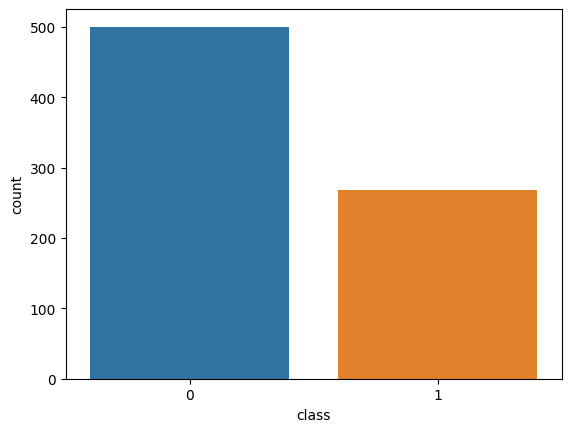

In [16]:
import seaborn as sns
sns.countplot(x='class',data=diabetes_dataset)

In [17]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(diabetes_dataset, test_size=0.25, random_state=0, stratify=diabetes_dataset['class']) 

# separate the 'class' column from training/testing data
train_X = train[train.columns[:8]]
test_X = test[test.columns[:8]]
train_Y = train['class']
test_Y = test['class']

In [18]:
#Statistical Model
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()
model_1.fit(train_X,train_Y)
prediction_1 = model_1.predict(test_X)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#accuracy is the percentage of correct predictions.
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_Y, prediction_1))

0.78125


In [20]:
#Confusion Matrix
from sklearn import metrics

confusion_matrix_1 = metrics.confusion_matrix(test_Y, prediction_1)
confusion_matrix_1

array([[110,  15],
       [ 27,  40]])

<Figure size 640x480 with 0 Axes>

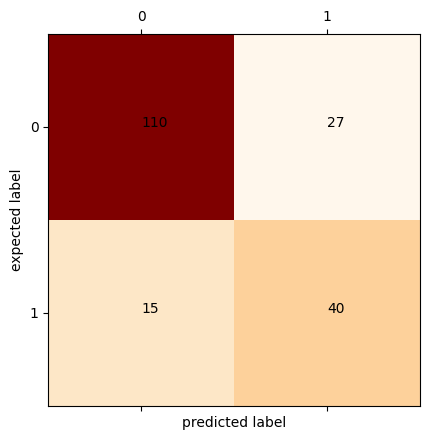

In [21]:
plt.figure()
plt.matshow(confusion_matrix_1,cmap='OrRd')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix_1[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [22]:
# [row, column]
TP = confusion_matrix_1[1, 1]
TN = confusion_matrix_1[0, 0]
FN = confusion_matrix_1[0, 1]
FP = confusion_matrix_1[1, 0]

print("Sensitivity: %.4f" % (TP / float(TP + FN)))
print("Specificity  : %.4f" % (TN / float(TN + FP)))

Sensitivity: 0.7273
Specificity  : 0.8029


In [23]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
model_1.predict(test_X)[0:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [24]:
test_Y.head(10)

147    0
565    0
390    0
736    0
587    0
267    0
435    1
328    1
148    0
242    1
Name: class, dtype: int64

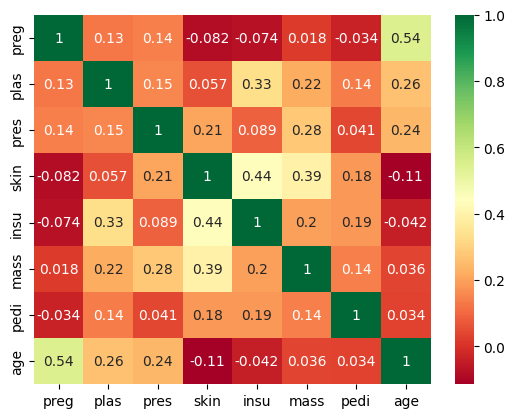

In [25]:
sns.heatmap(diabetes_dataset[diabetes_dataset.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

In [26]:
from sklearn import metrics
from sklearn.metrics import(precision_recall_fscore_support,recall_score,f1_score,classification_report,average_precision_score,precision_recall_curve)
print(metrics.classification_report(test_Y,prediction_1))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.73      0.60      0.66        67

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



Text(0.5, 1.0, 'Binary Class ROC curve')

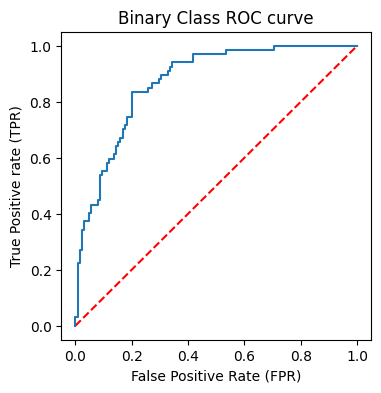

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
prob = model_1.predict_proba(test_X)[:,1]
fp, tp, e = roc_curve(test_Y, prob,pos_label=1)

plt.figure(figsize = (4,4))
plt.plot([0,1], [0,1], "r--")
plt.plot(fp, tp)

plt.title("Classifier AUC Score --> "+str(roc_auc_score(prediction_1, test_Y)), fontsize = 20);
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.title('Binary Class ROC curve')

In [29]:
#preprocessing train_X and test_X
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_X)
train_X=scaler.transform(train_X)
test_X=scaler.transform(test_X)
print("\n"*2)
print(train_X)
print("\n"*2)
print(test_X)




[[-8.77816622e-01 -1.26969662e+00  2.41637906e-01 ... -2.52580217e-01
   1.60307478e-01 -9.80244375e-01]
 [-5.84872025e-01 -5.52512113e-02 -3.62747333e+00 ... -1.61606272e+00
   1.05792717e+00  3.20337122e+00]
 [ 1.75868475e+00 -1.79809715e-01 -3.62747333e+00 ... -4.18570281e+00
  -6.22534613e-01 -3.10865881e-01]
 ...
 [-2.91927428e-01 -1.20741737e+00  3.24967582e-02 ... -1.41940659e+00
  -2.45828644e-01 -7.29227440e-01]
 [ 1.01716874e-03  1.09691495e+00  2.93923193e-01 ...  2.14662457e+00
  -6.90223966e-01 -1.43521257e-01]
 [-1.17076122e+00  1.25261308e+00 -1.01320898e+00 ... -1.31452332e+00
  -6.43135720e-01  2.61766503e+00]]



[[-0.58487203 -0.46006635 -0.28121496 ... -0.18702817  2.72955991
   0.02382337]
 [-0.58487203 -0.80260223 -0.80406783 ... -0.76388615  0.81071388
  -0.98024438]
 [-0.87781662 -0.6469041  -0.17664439 ...  0.00962796 -0.0839628
   0.69320186]
 ...
 [ 0.29396177 -1.02057962  0.45077905 ... -0.56723002 -0.63136366
   0.2748403 ]
 [-0.29192743 -1.05171924 -0.4

In [37]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
Model_2=KNeighborsClassifier(n_neighbors=17,p=2)
Model_2.fit(train_X,train_Y)
prediction_2=Model_2.predict(test_X)

In [31]:
#Model Accuracy
from sklearn import metrics
print(metrics.accuracy_score(test_Y, prediction_2))

0.7864583333333334


In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_Y,prediction_2))
print(classification_report(test_Y,prediction_2))
error=[]

[[112  13]
 [ 28  39]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       125
           1       0.75      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.78      0.79      0.78       192



Text(0.5, 1.0, 'Binary Class ROC curve')

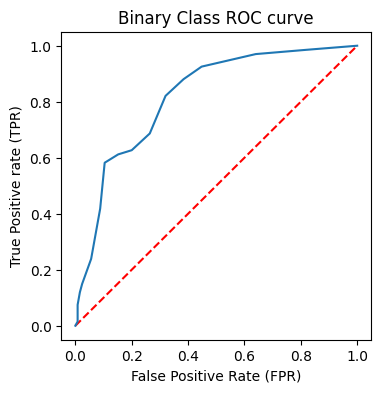

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
prob1 = Model_2.predict_proba(test_X)[:,1]
fp, tp, e = roc_curve(test_Y, prob1,pos_label=1)

plt.figure(figsize = (4,4))
plt.plot([0,1], [0,1], "r--")
plt.plot(fp, tp)

plt.title("Classifier AUC Score --> "+str(roc_auc_score(prediction_2, test_Y)), fontsize = 20);
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.title('Binary Class ROC curve')

In [40]:
#Calculatng Error for K Values Between 1 and 30
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_X,train_Y)
  pred_i=knn.predict(test_X)
  error.append(np.mean(pred_i!=test_Y))

Text(0, 0.5, 'Mean Error')

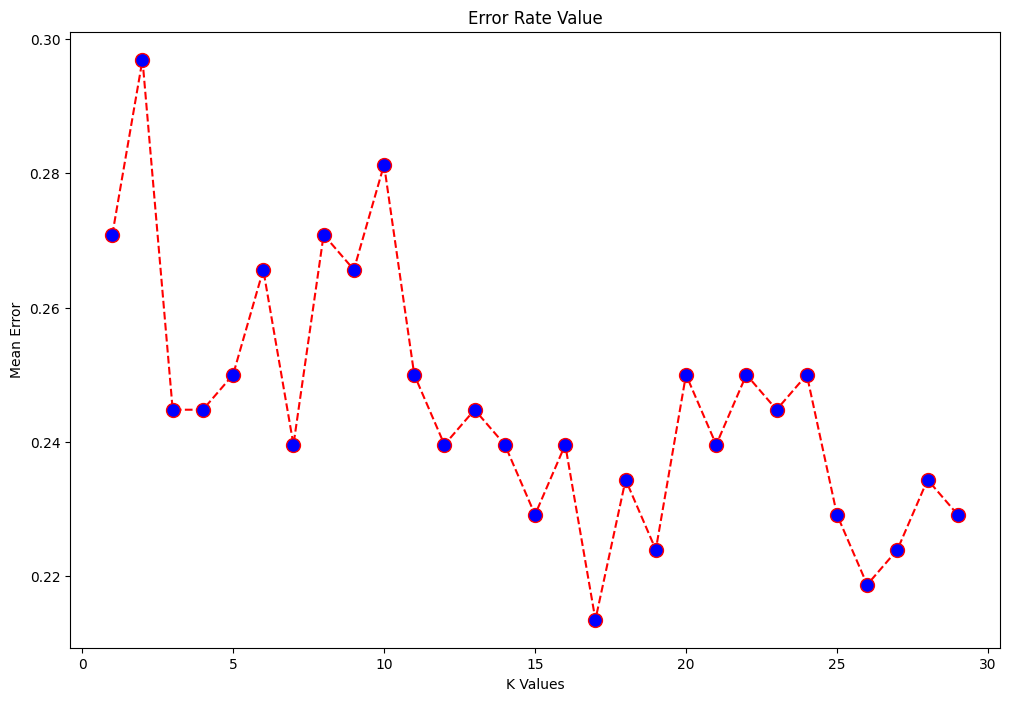

In [41]:
plt.figure(figsize=(12,8))
plt.plot(range(1,30),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate Value')
plt.xlabel('K Values')
plt.ylabel('Mean Error')